<a href="https://colab.research.google.com/github/vahehambardzumyan/MLBasics/blob/main/01_SF_Salaries_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'> <img src='../../Pierian_Data_Logo.png' /></a>
___

# SF Salaries Exercise

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

** Read Salaries.csv as a dataframe called sal.**

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('Salaries.csv')

** Check the head of the DataFrame. **

In [16]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Use the .info() method to find out how many entries there are.**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [18]:
df['BasePay'].mean()

np.float64(66325.4488404877)

** What is the highest amount of OvertimePay in the dataset ? **

In [20]:
df["OvertimePay"].max()

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [21]:
df["JobTitle"][df["EmployeeName"]=="JOSEPH DRISCOLL"]

,JobTitle
24,"CAPTAIN, FIRE SUPPRESSION"


** How much does JOSEPH DRISCOLL make (including benefits)? **

In [24]:
df["TotalPayBenefits"][df["EmployeeName"]=="JOSEPH DRISCOLL"]

,TotalPayBenefits
24,270324.91


** What is the name of highest paid person (including benefits)?**

In [32]:
df[df["TotalPayBenefits"]==df["TotalPayBenefits"].max()].loc[:,"EmployeeName"]

,EmployeeName
0,NATHANIEL FORD


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [34]:
df[df["TotalPayBenefits"]==df["TotalPayBenefits"].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [15]:
df.loc[:,["Year","BasePay"]].groupby("Year").mean()

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69630.030216
2014,66564.421924


from matplotlib import pyplot as plt
_df_0['BasePay'].plot(kind='hist', bins=20, title='BasePay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['BasePay'].plot(kind='line', figsize=(8, 4), title='BasePay')
plt.gca().spines[['top', 'right']].set_visible(False)

** How many unique job titles are there? **

In [18]:
df.loc[:,"JobTitle"].nunique()

2159

** What are the top 5 most common jobs? **

In [19]:
df.loc[:,"JobTitle"].value_counts().head(5)

,count
JobTitle,
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [20]:
df[df["Year"]==2013].loc[:,"JobTitle"].value_counts()[df[df["Year"]==2013].loc[:,"JobTitle"].value_counts()==1].count()

np.int64(202)

** How many people have the word Chief in their job title? (This is pretty tricky) **

In [25]:
df[df["JobTitle"].str.contains("Chief")].loc[:,"Id"].count()

np.int64(423)

** Bonus: Is there a correlation between length of the Job Title string and Salary? **

In [39]:
pd.concat([df.loc[:,"JobTitle"].str.len(),df.loc[:,"TotalPayBenefits"]],axis=1).corr()


,JobTitle,TotalPayBenefits
JobTitle,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


In [33]:
import seaborn as sns


<Axes: >

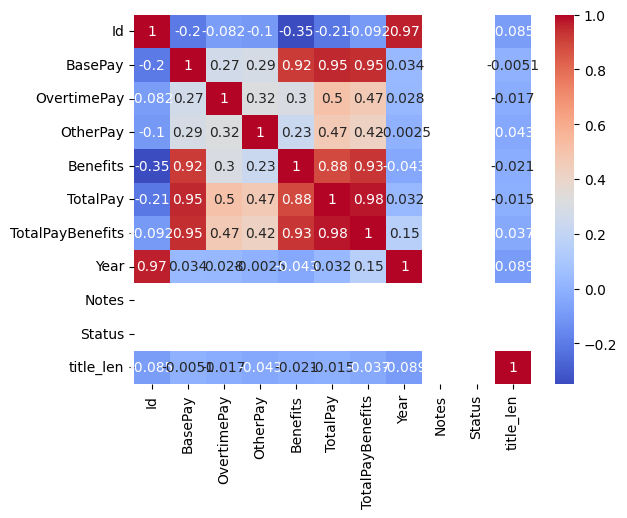

In [36]:
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


# Great Job!